## YouTube Trending Project
* ### Exploratory Data Analysis

### Table of Contents:
* 1.Exploratory Data Analysis
    * 1.1 Data Analysis
        * 1.1.1 Raw Data Information
    * 1.2 Feature Engineering
        * 1.2.1 Like/Dislike Ratio
        * 1.2.2 Log of Ratings, Views, and Comment Counts
        * 1.2.3 Days Lapsed
        * 1.2.4 Duration Columns
        * 1.2.5 Title Length
        * 1.2.6 Tag Count
    * 1.3 Variable Analysis
    * 1.4 Heat Map
    * 1.5 Plotting Distributions
    * 1.6 Category Analysis
        * 1.6.1 Graphing video counts by category
    * 1.7 Correlation Matrix
* 2.Cleaning
* 3.Modeling

### 1. Exploratory Data Analysis
##### Loading Data and Libraries


In [1]:
import helpers
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df = helpers.load_df("../YouTube-Trending/Data/US_Data.csv")

trend_df = df.copy()

trend_df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,duration,country
0,bPiofmZGb8o,Second 2020 Presidential Debate between Donald...,2020-10-23T02:49:33Z,UCb--64Gl51jIEVE-GLDAVTg,C-SPAN,25,20.23.10,C-SPAN|CSPAN|2020|Donald Trump|Republican|Whit...,6641600,94601,6209,59293,https://i.ytimg.com/vi/bPiofmZGb8o/default.jpg,False,False,President Donald Trump and former Vice Preside...,1H59M15S,US
1,tcYodQoapMg,Ariana Grande - positions (official video),2020-10-23T04:00:10Z,UC0VOyT2OCBKdQhF3BAbZ-1g,ArianaGrandeVevo,10,20.23.10,ariana grande positions|positions ariana grand...,7516529,1485130,10810,140549,https://i.ytimg.com/vi/tcYodQoapMg/default.jpg,False,False,The official “positions” music video by Ariana...,2M58S,US
2,np9Ub1LilKU,Jack Harlow - Tyler Herro [Official Video],2020-10-22T19:00:14Z,UC6vZl7Qj7JglLDmN_7Or-ZQ,Jack Harlow,10,20.23.10,jack harlow|jack rapper|harlow rapper|private ...,1499338,153028,2006,11013,https://i.ytimg.com/vi/np9Ub1LilKU/default.jpg,False,False,Jack Harlow - Tyler HerroListen now: https://J...,3M,US
3,5S4bm3bAt9Y,SURPRISING BEST FRIEND WITH BORAT!!,2020-10-21T19:56:24Z,UCef29bYGgUSoJjVkqhcAPkw,David Dobrik Too,22,20.23.10,[none],5320147,596894,7044,33648,https://i.ytimg.com/vi/5S4bm3bAt9Y/default.jpg,False,False,Thank you Borat for coming over!! I like youWa...,5M55S,US
4,GuEkHIgR46k,Bryson Tiller - Always Forever (Official Video),2020-10-22T16:00:08Z,UCwhe-6skwaZxLomc-U6Wy1w,BrysonTillerVEVO,10,20.23.10,Bryson Tiller 2020|Bryson Tiller Serenity|Brys...,862087,82059,657,4459,https://i.ytimg.com/vi/GuEkHIgR46k/default.jpg,False,False,A N N I V E R S A R Y OUT NOW!Stream/Download:...,2M59S,US


### 1.1 Data Overview
#### 1.1.1 Raw data information


In [2]:
np.shape(trend_df)

(1400, 18)

In [3]:
trend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           1400 non-null   object
 1   title              1400 non-null   object
 2   publishedAt        1400 non-null   object
 3   channelId          1400 non-null   object
 4   channelTitle       1400 non-null   object
 5   categoryId         1400 non-null   int64 
 6   trending_date      1400 non-null   object
 7   tags               1400 non-null   object
 8   view_count         1400 non-null   int64 
 9   likes              1400 non-null   int64 
 10  dislikes           1400 non-null   int64 
 11  comment_count      1400 non-null   int64 
 12  thumbnail_link     1400 non-null   object
 13  comments_disabled  1400 non-null   bool  
 14  ratings_disabled   1400 non-null   bool  
 15  description        1391 non-null   object
 16  duration           1400 non-null   object


### 1.2 Feature Engineering
* ##### 1.2.1 Like/Dislike Ratio
* ##### 1.2.2 Log of Ratings, Views, and Comment Counts
* ##### 1.2.3 Days Lapsed - Number of days between trending date and publish time
* ##### 1.2.4 Duration Columns - Video's duration broken down into hour, minute, and second columns
* ##### 1.2.5 Title Length - Character count of title
* ##### 1.2.6 Tag Count - Number of tags

In [4]:
# Feature Engineering
helpers.featureEng(trend_df)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,dislikes_log,comment_log,new_date_published,new_date_trending,days_lapse,durationHr,durationMin,durationSec,titleLength,tagCount
0,bPiofmZGb8o,Second 2020 Presidential Debate between Donald...,2020-10-23 02:49:33,UCb--64Gl51jIEVE-GLDAVTg,C-SPAN,25,2020-10-23,C-SPAN|CSPAN|2020|Donald Trump|Republican|Whit...,6641600,94601,...,8.733755,10.990247,2020-10-23,2020-10-23,0.0,1,59,15,66,12
1,tcYodQoapMg,Ariana Grande - positions (official video),2020-10-23 04:00:10,UC0VOyT2OCBKdQhF3BAbZ-1g,ArianaGrandeVevo,10,2020-10-23,ariana grande positions|positions ariana grand...,7516529,1485130,...,9.288227,11.853311,2020-10-23,2020-10-23,0.0,0,2,58,42,22
2,np9Ub1LilKU,Jack Harlow - Tyler Herro [Official Video],2020-10-22 19:00:14,UC6vZl7Qj7JglLDmN_7Or-ZQ,Jack Harlow,10,2020-10-23,jack harlow|jack rapper|harlow rapper|private ...,1499338,153028,...,7.603898,9.306832,2020-10-22,2020-10-23,1440.0,0,3,0,42,26
3,5S4bm3bAt9Y,SURPRISING BEST FRIEND WITH BORAT!!,2020-10-21 19:56:24,UCef29bYGgUSoJjVkqhcAPkw,David Dobrik Too,22,2020-10-23,[none],5320147,596894,...,8.859931,10.423709,2020-10-21,2020-10-23,2880.0,0,5,55,35,0
4,GuEkHIgR46k,Bryson Tiller - Always Forever (Official Video),2020-10-22 16:00:08,UCwhe-6skwaZxLomc-U6Wy1w,BrysonTillerVEVO,10,2020-10-23,Bryson Tiller 2020|Bryson Tiller Serenity|Brys...,862087,82059,...,6.487684,8.402680,2020-10-22,2020-10-23,1440.0,0,2,59,47,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,clC1SxA65PU,Hacking on the Dream SMP...,2020-12-14 14:15:03,UCJhTTqtsvThK99_IbNDtwSw,FundyLIVE,20,2020-12-21,fundy|fundylive|itsfundy|fundy minecraft|fundy...,2468513,148322,...,7.948738,8.633019,2020-12-14,2020-12-21,10080.0,0,14,9,27,33
1396,ZNVlIMHS1sk,"Donating $50,000 To Streamers With 0 Viewers",2020-12-13 19:10:23,UCIPPMRA040LQr5QPyJEbmXA,MrBeast Gaming,20,2020-12-21,[none],12225341,910862,...,8.834337,10.837500,2020-12-13,2020-12-21,11520.0,0,10,3,44,0
1397,h9bxHt7yDMo,Getting through 2020 | Ask How #WithMe,2020-12-15 17:42:27,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2020-12-21,Coronavirus|COVID|YouTube ad|YouTube advert|Wi...,6312884,31126,...,10.577350,9.482883,2020-12-15,2020-12-21,8640.0,0,1,38,38,5
1398,3DZmXYl3xVE,The Pacific Ocean is VASTLY Bigger Than You Think,2020-12-15 15:30:02,UCP5tjEmvPItGyLhmjdwP7Ww,RealLifeLore,27,2020-12-21,real life lore|real life lore maps|real life l...,767519,30907,...,6.618739,7.767687,2020-12-15,2020-12-21,8640.0,0,9,3,49,18


### 1.3 Variable Analysis
* ##### 1.3.1 Data Types
* ##### 1.3.2 Descriptive Statistics

In [5]:
trend_df.dtypes

video_id                      object
title                         object
publishedAt           datetime64[ns]
channelId                     object
channelTitle                  object
categoryId                     int64
trending_date         datetime64[ns]
tags                          object
view_count                     int64
likes                          int64
dislikes                       int64
comment_count                  int64
thumbnail_link                object
comments_disabled               bool
ratings_disabled                bool
description                   object
duration                      object
country                       object
likeRatio                    float64
likes_log                    float64
views_log                    float64
dislikes_log                 float64
comment_log                  float64
new_date_published            object
new_date_trending             object
days_lapse                   float64
durationHr                     int64
d

In [6]:
# Descriptive Statistics of the curated dataset
trend_df.describe()

,categoryId,view_count,likes,dislikes,comment_count,likeRatio,likes_log,views_log,dislikes_log,comment_log,days_lapse,durationHr,durationMin,durationSec,titleLength,tagCount
count,1363.000000,1.363000e+03,1.363000e+03,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000
mean,18.506236,2.500108e+06,1.482450e+05,2806.104916,14315.650037,0.940036,10.969317,14.077004,6.993690,8.508670,5211.680117,0.026412,9.575202,28.236244,51.073368,19.096112
std,7.545977,3.994527e+06,2.998347e+05,5281.424312,43531.283072,0.104756,1.371794,1.099641,1.348934,1.337027,2852.745857,0.197356,9.405884,18.151183,20.259525,12.162942
min,1.000000,3.325700e+04,4.580000e+02,21.000000,80.000000,-0.292719,6.126869,10.412021,3.044522,4.382027,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,10.000000,5.926400e+05,2.259250e+04,420.500000,2051.500000,0.938668,10.025373,13.292342,6.041438,7.626325,2880.000000,0.000000,3.000000,13.000000,38.000000,9.000000
50%,22.000000,1.201049e+06,5.660900e+04,926.000000,4602.000000,0.964936,10.943923,13.998706,6.830874,8.434246,5760.000000,0.000000,6.000000,28.000000,48.000000,20.000000
75%,24.000000,2.719256e+06,1.429150e+05,2796.000000,11527.500000,0.980011,11.870000,14.815868,7.935936,9.352491,7200.000000,0.000000,14.000000,44.000000,63.500000,29.000000
max,29.000000,4.324685e+07,3.033311e+06,54323.000000,761325.000000,0.998719,14.925165,17.582435,10.902703,13.542816,27360.000000,2.000000,59.000000,59.000000,100.000000,60.000000


### 1.4 Heat Map

Checking for Missing Values

<AxesSubplot:>

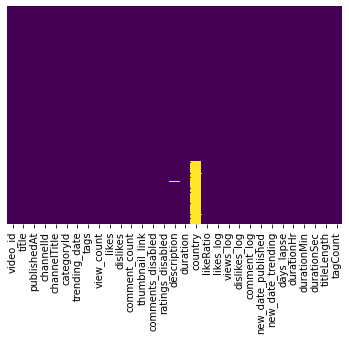

In [7]:
sns.heatmap(trend_df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

### 1.5 Plotting Distributions
#### 1.5.1 Distribution Graphs of Logs

Checking for normal distribution of views, likes, dislikes, and comment counts

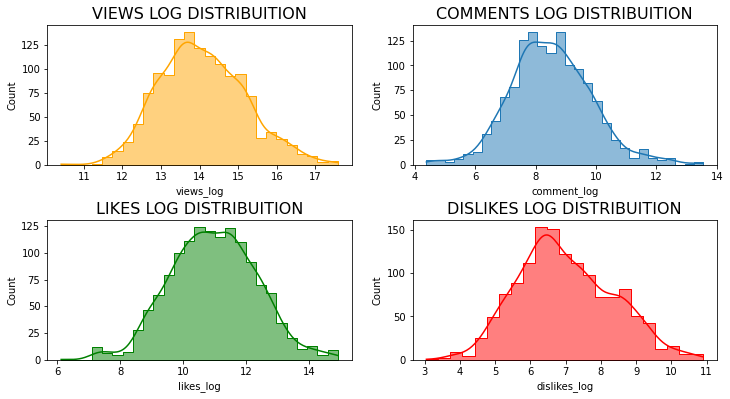

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

g1 = sns.histplot(ax=axes[0, 0], data=trend_df, x="views_log", kde=True, element="step", color="orange")
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

g2 = sns.histplot(ax=axes[0,1], data=trend_df, x="comment_log", kde=True, element="step")
g2.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

g3 = sns.histplot(ax=axes[1,0], data=trend_df, x="likes_log", kde=True, element="step", color="green")
g3.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

g4 = sns.histplot(ax=axes[1,1], data=trend_df, x="dislikes_log", kde=True, element="step", color="red")
g4.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)


#### 1.5.2 Finding Outlier Counts

Checking the number of outliers for the log variables

In [9]:
print(len(helpers.findOutliers(trend_df['views_log'])))

1276


In [10]:
print(len(helpers.findOutliers(trend_df['likes_log'])))

1245


In [11]:
print(len(helpers.findOutliers(trend_df['dislikes_log'])))

1274


In [12]:
print(len(helpers.findOutliers(trend_df['comment_log'])))

1265


### 1.6 Category Analysis

#### Category Dictionary
- 2 - Autos & Vehicles 
- 1 - Film & Animation
- 10 - Music
- 17 - Sports
- 19 - Travel & Events
- 20 - Gaming
- 22 - People & Blogs
- 23 - Comedy
- 24 - Entertainment
- 25 - News & Politics
- 26 - Howto & Style
- 27 - Education
- 28 - Science & Technology
- 29 - Nonprofits & Activism 
<br> More at: https://gist.github.com/dgp/1b24bf2961521bd75d6c



In [13]:
# Figuring out the popular categories
trend_df.categoryId.value_counts()

10    318
24    264
17    168
28    109
20    100
22     94
23     77
26     68
1      47
2      38
27     33
25     30
29     11
19      5
15      1
Name: categoryId, dtype: int64

##### 1.6.1 Graphing video counts by category
Music, Entertainment, and Sports seem to have the most videos.

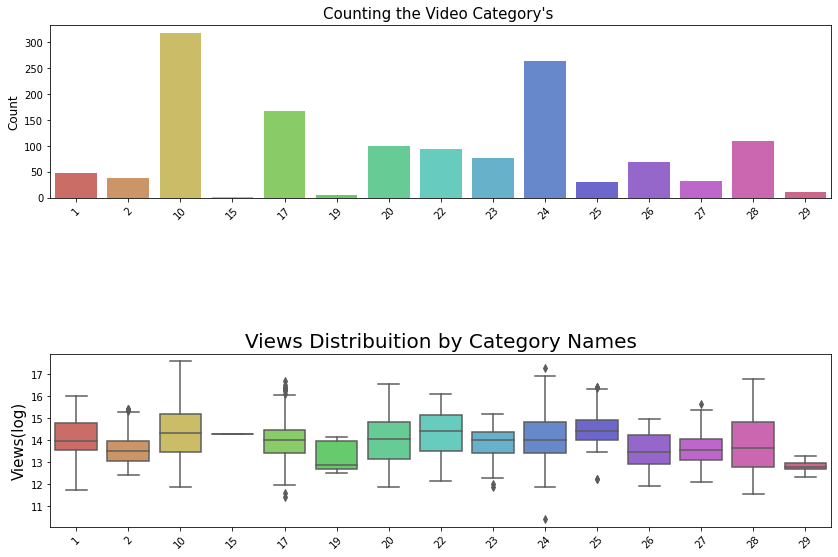

In [14]:
plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot(x='categoryId', data=trend_df, palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='categoryId', y='views_log', data=trend_df, palette="hls")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

### 1.7 Correlation Matrix

Drop varaiables with close to zero correlation

<AxesSubplot:>

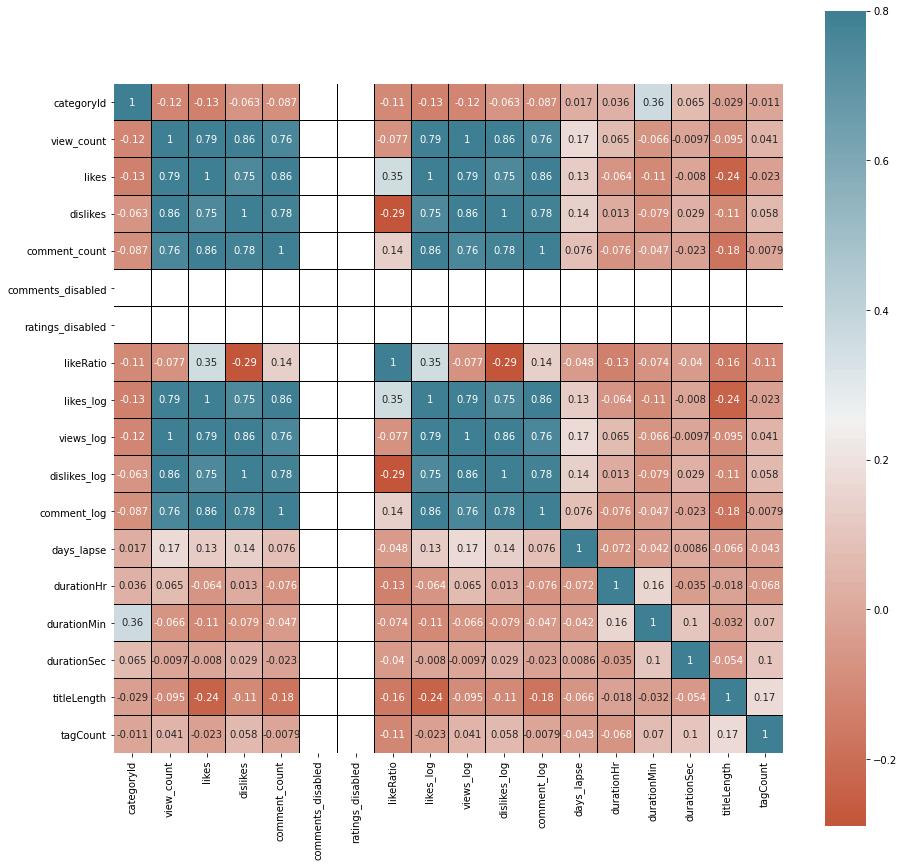

In [15]:
corr = trend_df.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap = sns.diverging_palette(20, 220, n=200), linecolor='black')
